<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

Data info from https://keras.io/datasets/

>Boston housing price regression dataset
Dataset taken from the StatLib library which is maintained at Carnegie Mellon University.
>
>Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

In [3]:
##### Your Code Here #####
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
# Normalize inputs
from sklearn.preprocessing import Normalizer

x_train = Normalizer().transform(x_train)
x_test = Normalizer().transform(x_test)

In [13]:
print('Train shape:', x_train.shape)
print('Test shape:', x_test.shape)

Train shape: (404, 13)
Test shape: (102, 13)


In [0]:
# Set up the model
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # default activation function is 'linear'

model.compile(optimizer='adam', loss='mean_squared_error', 
              metrics=['mean_squared_error'])

In [0]:
# Fit the model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='mean_squared_error', 
                           min_delta=.1, patience=5)

fit_stats = model.fit(x_train, y_train, epochs=1000, verbose=0, 
                      validation_data=(x_test, y_test), callbacks=[early_stop])

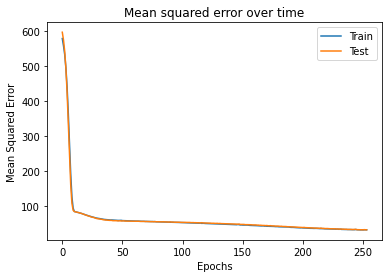

In [75]:
# Graph accuracy over time
import matplotlib.pyplot as plt

epochs = range(len(fit_stats.history['mean_squared_error']))
plt.plot(epochs, fit_stats.history['mean_squared_error'], label='Train')
plt.plot(epochs, fit_stats.history['val_mean_squared_error'], label='Test')

plt.title('Mean squared error over time')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [76]:
# Report final accuracy
scores = model.evaluate(x_test, y_test)
print("\nValidation Data Metrics:")
print(f"{model.metrics_names[0]}: {scores[0]}")
print(f"{model.metrics_names[1]}: {scores[1]}")

4/4 [==============================] - 0s 3ms/step - loss: 37.8765 - mean_squared_error: 31.4718

Validation Data Metrics:
loss: 37.876502990722656
mean_squared_error: 31.47176170349121


### Run this same data through a linear regression model. Which achieves higher accuracy?

In [47]:
# Compare to linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and fit the model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Evaluate
y_pred = lr.predict(x_train)
print('Train mean squared error:', mean_squared_error(y_train, y_pred))
y_pred = lr.predict(x_test)
print('Test mean squared error: ', mean_squared_error(y_test, y_pred))

Train mean squared error: 22.77423909605731
Test mean squared error:  18.16551049349646


In [78]:
# Mean baseline
y_mean = [y_train.mean()] * len(y_test)
print('Mean baseline guess:', y_train.mean().round(2))
print('Mean baseline MSE:', mean_squared_error(y_test, y_mean))

Mean baseline guess: 22.4
Mean baseline MSE: 83.71085929676252


### Do a little bit of feature engineering and see how that affects your neural network model.

I got feature information from the Keras tutorial page: https://keras.rstudio.com/articles/tutorial_basic_regression.html

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

In [68]:
# Got column names from https://keras.rstudio.com/articles/tutorial_basic_regression.html
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df_train = pd.DataFrame(x_train, columns=column_names)
df_test = pd.DataFrame(x_test, columns=column_names)

df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.002412,0.000000,0.015930,0.0,0.001053,0.012020,0.179454,0.007783,0.007828,0.600788,0.041096,0.776719,0.036634
1,0.000041,0.154587,0.003804,0.0,0.000778,0.014260,0.029418,0.011749,0.003748,0.652077,0.027545,0.740857,0.005827
2,0.006345,0.000000,0.023446,0.0,0.000817,0.006438,0.129538,0.001726,0.031089,0.862723,0.026167,0.486441,0.004223
3,0.000087,0.000000,0.011339,0.0,0.001125,0.013190,0.075376,0.013077,0.010924,0.489400,0.044133,0.867155,0.017500
4,0.004743,0.000000,0.023248,0.0,0.000916,0.008189,0.113541,0.003297,0.030826,0.855411,0.025945,0.502753,0.018816


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

Again from https://keras.io/datasets/

Fashion-MNIST database of fashion articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

In [84]:
##### Your Code Here #####
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [85]:
# Input data is 28x28 images
x_train[0].shape

(28, 28)

In [87]:
# target labels before
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [90]:
# target labels after
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [91]:
# Number of samples in each
print('Train shape:', x_train.shape)
print('Test shape:', x_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [105]:
# took about 6-7 seconds per epoch on a test run with verbose=1
%%time

# Set up a Keras model
model = models.Sequential()

model.add(layers.Flatten(input_shape=x_train[0].shape))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Stop if accuracy changed by less than .001 over the last 5 epochs
early_stop = EarlyStopping(monitor='accuracy', min_delta=.001, patience=5)

# Fit that model
results = model.fit(x_train, y_train, epochs=100, workers=4, verbose=0,
                    validation_data=(x_test, y_test), callbacks=[early_stop])

print(f"Training stopped after {len(results.epoch)} epochs")
print(f"Training accuracy: {results.history['accuracy'][-1]}")
print(f"Validation accuracy: {results.history['val_accuracy'][-1]}")
print() # new line before the %%time results

Training stopped after 37 epochs
Training accuracy: 0.8489999771118164
Validation accuracy: 0.8331999778747559

CPU times: user 2min 27s, sys: 27.2 s, total: 2min 54s
Wall time: 2min 9s


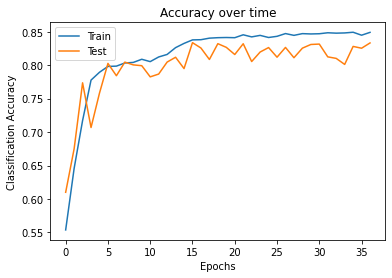

In [106]:
# Graph accuracy over time
epochs = range(len(results.history['accuracy']))
plt.plot(epochs, results.history['accuracy'], label='Train')
plt.plot(epochs, results.history['val_accuracy'], label='Test')

plt.title('Accuracy over time')
plt.xlabel('Epochs')
plt.ylabel('Classification Accuracy')
plt.legend()
plt.show()

### Try different hyperparameters

In [0]:
def Get_Model(optimizer, loss_func):
  """ Returns a compiled Keras model with the given parameters """

  model = models.Sequential()
  model.add(layers.Flatten(input_shape=x_train[0].shape))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])
  return model

In [153]:
%%time

# Comparing optimizers first
optimizers = ['adam', 'nadam', 'sgd', 'rmsprop', 'ftrl']
all_results = []

for opt in optimizers:
  # remake then fit the model
  model = Get_Model(optimizer=opt, loss_func='categorical_crossentropy')

  early_stop = EarlyStopping(monitor='accuracy', min_delta=.001, patience=5)
  results = model.fit(x_train, y_train, epochs=100, workers=4, verbose=0,
                      validation_data=(x_test, y_test), callbacks=[early_stop])
  
  all_results.append(results)

CPU times: user 11min 45s, sys: 2min 12s, total: 13min 57s
Wall time: 10min 21s


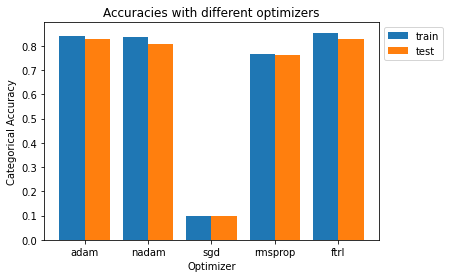

In [154]:
import numpy as np

train_acc = []
test_acc = []
for i in range(len(optimizers)):
  train_acc.append(all_results[i].history['accuracy'][-1])
  test_acc.append(all_results[i].history['val_accuracy'][-1])

plt.bar(np.arange(-.2,4).tolist(), train_acc, width=.4, label='train')
plt.bar(np.arange(.2,5).tolist(), test_acc, width=.4, label='test')

plt.title('Accuracies with different optimizers')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Optimizer')
plt.xticks(ticks=range(len(optimizers)), labels=optimizers)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [155]:
# Number of epochs needed for each optimizer
for i in range(len(optimizers)):
  print(f"Optimizer {optimizers[i]} stopped after {len(all_results[i].epoch)} epochs")

Optimizer adam stopped after 27 epochs
Optimizer nadam stopped after 29 epochs
Optimizer sgd stopped after 8 epochs
Optimizer rmsprop stopped after 19 epochs
Optimizer ftrl stopped after 83 epochs


I'm curious if SGD was just stopped too early, so I will run it again with no early stopping.

In [156]:
# Fit that model
model = Get_Model(optimizer='sgd', loss_func='categorical_crossentropy')
results = model.fit(x_train, y_train, epochs=100, workers=4, verbose=0,
                    validation_data=(x_test, y_test))

print(f"Training stopped after {len(results.epoch)} epochs")
print(f"Training accuracy: {results.history['accuracy'][-1]}")
print(f"Validation accuracy: {results.history['val_accuracy'][-1]}")

Training stopped after 100 epochs
Training accuracy: 0.11753333359956741
Validation accuracy: 0.12809999287128448



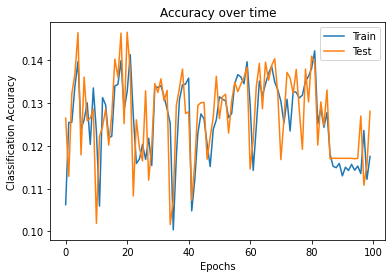

In [157]:
# Graph accuracy over time
epochs = range(len(results.history['accuracy']))
plt.plot(epochs, results.history['accuracy'], label='Train')
plt.plot(epochs, results.history['val_accuracy'], label='Test')

plt.title('Accuracy over time')
plt.xlabel('Epochs')
plt.ylabel('Classification Accuracy')
plt.legend()
plt.show()

Turns out that SGD just doesn't work for this problem.  Or at least not with this network architecture.

### Cross-validation

The above graphs were optained by running a model with each optimizer just once, so there is some chance that randomness skewed the results.

The code below demonstrates cross-validation for just one of the optimizers (adam).  It took around 10 minutes to run with 5 folds, since this is just a practice assignment I will forgo running it on all the optimizer options.

In [159]:
from sklearn.model_selection import KFold

folding_results = []
fold = 1
for train_index,val_index in KFold(n_splits=5).split(x_train):
  # split x_train and y_train according to KFold
  cvx_train,cvx_val=x_train[train_index],x_train[val_index]
  cvy_train,cvy_val=y_train[train_index],y_train[val_index]

  # get new model
  model = Get_Model(optimizer='adam', loss_func='categorical_crossentropy')

  # fit for this fold
  early_stop = EarlyStopping(monitor='accuracy', min_delta=.001, patience=5)
  result = model.fit(cvx_train, cvy_train, epochs=100, workers=4, verbose=0, 
                     validation_data=(cvx_val, cvy_val), callbacks=[early_stop])

  # print progress
  print(f'Fold {fold} complete.  Validation accuracy:', 
        result.history['val_accuracy'][-1])
  fold += 1

  folding_results.append(result)

Fold 1 complete.  Validation accuracy: 0.8130000233650208
Fold 2 complete.  Validation accuracy: 0.827833354473114
Fold 3 complete.  Validation accuracy: 0.765583336353302
Fold 4 complete.  Validation accuracy: 0.827750027179718
Fold 5 complete.  Validation accuracy: 0.7879999876022339


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.